Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-0bup80xr
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-0bup80xr
  Resolved https://github.com/huggingface/diffusers.git to commit 9fb02175485db873664cd5841c72add6ac512692
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


  0%|          | 0/50 [00:00<?, ?it/s]

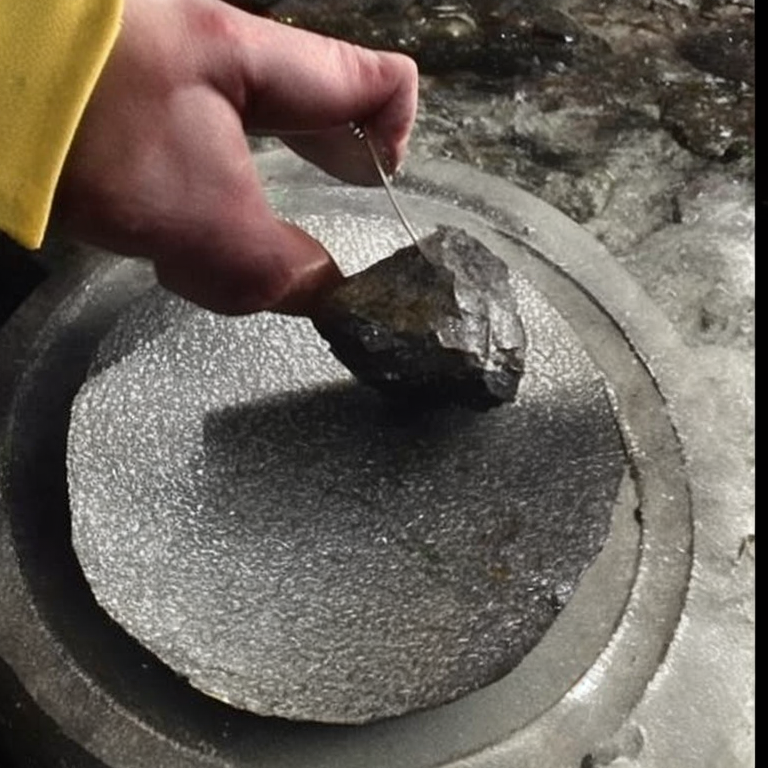

In [7]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy torch
from IPython.display import Image,display_png
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

# Stable Diffusion v2のモデル名
model_id = "stabilityai/stable-diffusion-2"

# ノイズスケジューラ
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# 重みのダウンロード & モデルのロード
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
# GPU必要。
pipe = pipe.to("cuda")

# 入力テキスト
prompt = "A cook destroys a meteorite with his fist"
image = pipe(prompt).images[0]
image.show()